## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [32]:
x_train.shape


(60000, 28, 28)

In [33]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [34]:
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils
trainY=np_utils.to_categorical(y_train,10)
testY=np_utils.to_categorical(y_test,10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train/255
x_test=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
trainX=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
testX=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Activation,Flatten,Dropout,Dense
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [39]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs=10
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(trainX,trainY, validation_data=(testX,testY), epochs=epochs, batch_size=32 , callbacks=callback_list)
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.3734 - acc: 0.8647 - val_loss: 0.3120 - val_acc: 0.8843
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.2332 - acc: 0.9149 - val_loss: 0.2460 - val_acc: 0.9081
Epoch 3/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.1728 - acc: 0.9359 - val_loss: 0.2684 - val_acc: 0.9072
Epoch 4/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1244 - acc: 0.9533 - val_loss: 0.2646 - val_acc: 0.9144
Epoch 5/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0847 - acc: 0.9683 - val_loss: 0.3046 - val_acc: 0.9125
Epoch 6/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0582 - acc: 0.9782 - val_loss: 0.3468 - val_acc: 0.9085
Epoch 7/10
60000/60

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [42]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2 , padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
____

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs=10
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(trainX,trainY, validation_data=(testX,testY), epochs=epochs, batch_size=32 , callbacks=callback_list)
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.3899 - acc: 0.8585 - val_loss: 0.2889 - val_acc: 0.8946
Epoch 2/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.2590 - acc: 0.9044 - val_loss: 0.2445 - val_acc: 0.9115
Epoch 3/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2103 - acc: 0.9228 - val_loss: 0.2382 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.1754 - acc: 0.9345 - val_loss: 0.2302 - val_acc: 0.9177
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1506 - acc: 0.9440 - val_loss: 0.2241 - val_acc: 0.9213
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1286 - acc: 0.9514 - val_loss: 0.2267 - val_acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1096 - acc: 0.9586 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range=90)

In [0]:
datagen.fit(trainX)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

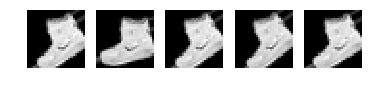

In [52]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [60]:
history = model.fit_generator(image_gen.flow(trainX,trainY),         
          epochs=5,
          verbose=1,
          validation_data=datagen.flow(testX, testY),callbacks=[early_stopping])

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3787 - acc: 0.8639 - val_loss: 0.3842 - val_acc: 0.8631
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3635 - acc: 0.8679 - val_loss: 0.3564 - val_acc: 0.8698
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3493 - acc: 0.8736 - val_loss: 0.3470 - val_acc: 0.8764
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3408 - acc: 0.8763 - val_loss: 0.3410 - val_acc: 0.8803
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3299 - acc: 0.8801 - val_loss: 0.3456 - val_acc: 0.8756


###  Report the final train and validation accuracy

In [61]:
model.history.history['val_acc'][-1]

0.8756

In [62]:
model.history.history['acc'][-1]

0.8801166666666667

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
image_gen2 = ImageDataGenerator(rotation_range=90,horizontal_flip=True, vertical_flip=True,width_shift_range=0.2, height_shift_range=0.3)

In [86]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255

### **Prepare/fit the generator.**

In [0]:
image_gen2.fit(x_train)

In [0]:
input_shape = (32,32,3)
num_classes = 10

model2 = Sequential() 
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=2 , padding='same'))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(num_classes, activation='softmax'))

In [0]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1,patience=5)

In [94]:
history = model2.fit_generator(image_gen.flow(x_train,y_train),         
          epochs=10,
          verbose=1,
          validation_data=datagen.flow(x_test, y_test),callbacks=[es])

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6216 - acc: 0.4170 - val_loss: 1.4167 - val_acc: 0.4903
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3885 - acc: 0.5047 - val_loss: 1.2876 - val_acc: 0.5435
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2839 - acc: 0.5471 - val_loss: 1.2663 - val_acc: 0.5507
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2190 - acc: 0.5690 - val_loss: 1.1966 - val_acc: 0.5747
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1781 - acc: 0.5826 - val_loss: 1.1606 - val_acc: 0.5910
Epoch 6/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.1445 - acc: 0.5964 - val_loss: 1.1421 - val_acc: 0.5992
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1180 - acc: 0.6053 - val_loss: 1.1281 - val_acc: 0.6079
Epoch 8/10
1563/1563 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


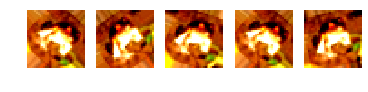

In [95]:
from matplotlib import pyplot as plt
gen = image_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='viridis')
    plt.plot()
plt.show()